In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Data Reading

In [4]:
# df=pd.read_csv('D:/downloads/dataset.csv')
df=pd.read_csv('./dataset.csv')
df

,TP9-mean window,TP9-the standard deviation,TP9-skewness,TP9-kurtosis,TP9-derivative,TP9-max,TP9-min,TP9-mean 1,TP9-max 1,TP9-min 1,...,phase synchronization - AF8- Right AUX -band- theta,phase synchronization - AF8- Right AUX -band- alpha,phase synchronization - AF8- Right AUX -band- beta,phase synchronization - AF8- Right AUX -band- gamma,phase synchronization - TP10- Right AUX -band- delta,phase synchronization - TP10- Right AUX -band- theta,phase synchronization - TP10- Right AUX -band- alpha,phase synchronization - TP10- Right AUX -band- beta,phase synchronization - TP10- Right AUX -band- gamma,result
0,72.587996,18.520497,-0.208465,-0.481328,0.0,0.0,0.0,69.833111,113.765343,22.967101,...,4.340520,8.311543,7.917935,6.352444,1.201990,-2.190131,-4.347312,-5.151794,11.442484,concentrating
1,65.221744,18.381196,0.288655,-0.764314,0.0,0.0,0.0,80.758485,107.420643,42.257251,...,7.229973,11.104055,19.131774,19.892254,-0.953467,1.774966,5.688634,11.627311,11.057695,concentrating
2,45.434085,16.161556,-0.036896,0.750862,0.0,0.0,0.0,53.313055,77.904152,24.902000,...,2.419004,2.042830,10.413272,20.447893,0.914297,1.843886,-0.405963,3.906403,10.822170,concentrating
3,33.277950,17.077295,0.318936,1.324313,0.0,0.0,0.0,46.287609,106.256406,21.025672,...,-3.604331,-5.377698,-7.331047,-21.333963,0.769100,-0.470022,0.944344,-7.045931,-12.533505,concentrating
4,28.668740,14.362481,-0.011843,-0.046192,0.0,0.0,0.0,22.134124,56.962407,-15.413118,...,2.742298,5.565032,8.909078,17.845896,2.347619,3.157249,0.424735,12.267550,42.892226,concentrating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4330,37.527460,26.797563,0.836324,0.509637,0.0,0.0,0.0,19.570584,45.462875,-12.319791,...,3.381407,9.583828,17.939944,18.948485,3.387087,9.263854,10.317312,8.688252,5.608474,relaxed
4331,38.908199,26.524121,0.706831,0.565412,0.0,0.0,0.0,70.700304,131.997754,24.697913,...,-1.110146,-7.374990,-1.304724,-5.926115,-2.838793,-8.555428,-13.612269,-8.866112,-8.862449,relaxed
4332,25.239781,16.815828,-0.042485,-0.633554,0.0,0.0,0.0,30.168839,61.548887,-0.607135,...,-5.836833,-0.763383,0.695603,3.872193,-4.317583,-0.133704,2.730063,-3.913123,-1.376101,relaxed
4333,23.063430,16.100800,0.123706,-0.739186,0.0,0.0,0.0,20.981075,51.500539,-9.432919,...,1.634472,-4.354624,-4.781486,-1.546017,4.609904,9.131537,11.529019,14.853530,17.975652,relaxed


In [5]:
# df.describe()

In [6]:
# df.dtypes

# Model Training on all features

In [7]:
X = df.drop("result", axis = 1)
y = df["result"]

# Encodes categorical 

In [8]:
from sklearn.preprocessing import LabelEncoder
def transform_categorical(data):
    categories = (data.dtypes =="object")
    cat_cols = list(categories[categories].index)
    label_encoder = LabelEncoder()
    for col in cat_cols:
        data[col] = label_encoder.fit_transform(data[col])


## Scales numerical columns

In [9]:
from sklearn.preprocessing import MinMaxScaler
def scale_numerical(data):
    scaler = MinMaxScaler()
    data[data.columns] = scaler.fit_transform(data[data.columns])

In [10]:
from sklearn.utils.multiclass import unique_labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
classes=label_encoder.classes_
unique_labels(y)

array([0, 1, 2])

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## Cross validation

In [59]:
def crossValidation(model,x,y,model_name):
    # Define the list of performance metrics to be computed
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv_results = cross_validate(model, x, y, scoring=scoring, cv=10)
    print(model_name)
    print("%s: %0.2f (+/- %0.2f)" % ('fit_time', cv_results['fit_time'].mean(), cv_results['fit_time'].std() * 2))
#     print("%s: %0.2f (+/- %0.2f)" % ('score_time', cv_results['score_time'].mean(), cv_results['score_time'].std() * 2))
    print("Accuracies: ")
#     print("%s: %0.4f (+/- %0.2f)" % ('accuracy', cv_results['test_' + 'accuracy'].mean(), cv_results['test_' + 'accuracy'].std() * 2))
    # Print the mean and standard deviation of each performance metric
    for metric in scoring:
        print("%s: %0.4f (+/- %0.4f)" % (metric, cv_results['test_' + metric].mean(), cv_results['test_' + metric].std() * 2))
    return cv_results['test_' + 'accuracy'].mean()

In [14]:
nb_classifier = GaussianNB()
decision_tree_model = DecisionTreeClassifier(criterion="entropy",random_state=0)
support_vector_machine = svm.SVC()
Ada_Boost_Classifier = AdaBoostClassifier(random_state=0)
random_forest_classifier = RandomForestClassifier(random_state=0)
knn = KNeighborsClassifier(n_neighbors=7)

# models = [("1) Naive Bayes ",nb_classifier),
#           ("2) Support vector machine ",support_vector_machine),
#           ("3) Decision tree ",decision_tree_model),
#           ("4) Random forest ",random_forest_classifier),
#           ("5) KNN ",knn),
#           ("6) Ada Boost ",Ada_Boost_Classifier)]

models = [("1) Naive Bayes ",nb_classifier),
          ("2) Support vector machine ",support_vector_machine),
          ("3) Decision tree ",decision_tree_model),
          ("4) Random forest ",random_forest_classifier),
          ("5) KNN ",knn)]

In [12]:
def get_all_models_cross_validation_scores(models,x,y):
    models_accuracy = {}
    for name, clf in models:
        print("*"*50)
        accuracy = crossValidation(clf,x,y,name)
        models_accuracy[name] = accuracy
    return models_accuracy

In [13]:
# Keep a Copy of the Original training and test data for later use
X_original = X.copy()

In [15]:
# get_all_models_cross_validation_scores(models,X_original,y)

In [16]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Feature Selection using Filter Methods
Applying filter methods to select features including : 
-  Basic filters (Remove Constant Features , Remove Quasi-Constant Features ,  Remove Duplicate Features ,  Remove Features with Correlation)
-  Select K Best Mutual information
-  Select K Best Univariate ROC-AUC 

## Model Training on selected features

In [17]:
column_names = X.columns
print(y.shape)

(4335,)


In [18]:
# Keep a Copy of the Original training and test data for later use
print(X.shape)
print(X_original.shape)

(4335, 450)
(4335, 450)


## 1) Basic Filters

### Step-1 : Get and Remove Constant Features from Dataset

In [15]:
def remove_constant_features(X):
    X_copy = X
    # remove constant features
    constant_features = [feat for feat in X_copy.columns if X_copy[feat].std() == 0]
    X_copy.drop(labels=constant_features, axis=1, inplace=True)
    return X_copy

In [18]:
X = remove_constant_features(X)
X.shape

(4335, 435)

### Step-2: Remove Quasi-Constant Features from Dataset

In [26]:
from sklearn.feature_selection import VarianceThreshold


In [24]:
def remove_Quasi_Constant_Features(X):
    X_copy = X
    sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately
    sel.fit(X_copy)  # fit finds the features with low variance
    # Get the remaining features
    features_to_keep = X_copy.columns[sel.get_support()]
    # Remove the constant features
    X = sel.transform(X_copy)
    # Transform the arrays back to Dataframes
    X_copy= pd.DataFrame(X_copy)
    X_copy.columns = features_to_keep
    return X_copy

In [27]:
X = remove_Quasi_Constant_Features(X)
X.shape

(4335, 420)

### Step-3: Detect and Remove Duplicate Features

In [28]:
def remove_duplicated_features(X):
    X_copy = X
    # Check for duplicated features in the training set
    duplicated_feat = []
    for i in range(0, len(X_copy.columns)):
        col_1 = X.columns[i]
        for col_2 in X_copy.columns[i + 1:]:
            if X_copy[col_1].equals(X_copy[col_2]):
                duplicated_feat.append(col_2) 
    X_copy.drop(labels=duplicated_feat[1:], axis=1, inplace=True)
    return X_copy

In [32]:
X = remove_duplicated_features(X)
X.shape

(4335, 406)

### Step-4: Detect and Remove Features with Correlation

In [33]:
# Find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [34]:
def remove_correlated_features(X,threshold):  
    X_copy = X
    corr_features = correlation(X_copy, threshold)
    X.drop(labels=corr_features, axis=1, inplace=True)
    return X

In [36]:
correlated = remove_correlated_features(X,0.9)  
correlated.shape

(4335, 288)

In [ ]:
# from sklearn.feature_selection import filter_method 
# corr = ft.corr_feature_detect(data=X,threshold=0.9)
# # print all the correlated feature groups!
# for i in corr:
#     print(i,'\n')

In [37]:
# X.drop(labels=corr_features, axis=1, inplace=True)
X.shape

(4335, 288)

In [ ]:
# Keep a copy of the uncorrelated dataset except constant and duplicated variables to measure the performance of machine learning models
X_uncorrelated_features = X.copy()

In [ ]:
uncorrelated_accuracy = get_all_models_cross_validation_scores(models,X_uncorrelated_features,y)

In [ ]:
uncorrelated_accuracy

## 2) Mutual information
Mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_basic_filter, y, test_size=0.30, random_state=42)

In [32]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

In [ ]:
def select_K_mutual_info_classif(K,X,y):
    # Apply the SelectKBest feature selection algorithm with mutual information gain
    selector = SelectKBest(mutual_info_classif, k=K)
    X_basic_mutual = selector.fit_transform(X, y)

    # Get the index of the selected features
    idx_features = selector.get_support(indices=True)
    # Get the names of the selected features
    feature_names = X.columns[idx_features]
    # Print the names of the selected features
    selected_features = X[feature_names]
    
    return selected_features

## 3) Univariate ROC-AUC

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score


In [43]:
def select_top_roc_values(X,y ,K):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    # loop to build a tree, make predictions and get the roc-auc
    # for each feature of the train set
    roc_values = []
    for feature in X_train.columns:
        clf = DecisionTreeClassifier()
        clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
        y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
        roc_values.append(roc_auc_score(y_test, y_scored , multi_class='ovr'))
        
    # Convert ROC AUC scores to a pandas Series object
    roc_values = pd.Series(roc_values, index=X_train.columns)

    # Select the top 20 features based on ROC AUC score
    top_features = roc_values.nlargest(K).index
    print(top_features)

    # Choose the top 30 features from the original dataframe
#     X_train_top = X_train[top_features]
#     X_test_top = X_test[top_features]
    X_top = X[top_features]
    return X_top

In [ ]:
X_basic_top = select_top_roc_values(X_basic_filter,y,35)

In [49]:
selected_155_features_top = select_top_roc_values(selected_155_features,y)

Index(['AF8-gamma-mean', 'AF8-gamma-psd_mean', 'TP9-gamma-psd_max',
       'AF8-gamma-psd_max', 'TP9-gamma-std', 'AF8-gamma-std',
       'TP9-gamma-psd_std', 'AF8-gamma-psd_std', 'AF8-the standard deviation',
       'TP9-gamma-psd_mean', 'AF8-beta-mean', 'AF8-beta-psd_std',
       'AF8-beta-psd_mean', 'AF8-beta-std', 'AF8-beta-psd_max', 'AF8-fft_mean',
       'AF8-gamma-skewness', 'AF8-min 2', 'AF8-gamma-kurtosis', 'AF8-min 3',
       'AF8-min 4', 'AF8-min 1', 'AF8-delta-mean', 'AF8-theta-mean',
       'AF7-beta-psd_std', 'AF8-alpha-mean', 'AF7-beta-psd_mean',
       'AF8-alpha-psd_max', 'AF7-beta-std', 'AF7-gamma-mean',
       'TP10-gamma-kurtosis', 'AF7-beta-mean', 'TP10-gamma-psd_std',
       'AF8-distance-mean-2-4', 'TP9-gamma-kurtosis'],
      dtype='object')


In [60]:
get_all_models_cross_validation_scores(models,selected_155_features_top,y)

**************************************************
1) Naive Bayes 
fit_time: 0.00 (+/- 0.00)
Accuracies: 
accuracy: 0.8063 (+/- 0.18)
accuracy: 0.8063 (+/- 0.1797)
precision_macro: 0.7616 (+/- 0.4004)
recall_macro: 0.6897 (+/- 0.3228)
f1_macro: 0.6871 (+/- 0.3343)
**************************************************
2) Support vector machine 
fit_time: 0.37 (+/- 0.05)
Accuracies: 
accuracy: 0.7667 (+/- 0.23)
accuracy: 0.7667 (+/- 0.2298)
precision_macro: 0.7949 (+/- 0.2375)
recall_macro: 0.6500 (+/- 0.2295)
f1_macro: 0.6614 (+/- 0.2166)
**************************************************
3) Decision tree 
fit_time: 0.08 (+/- 0.02)
Accuracies: 
accuracy: 0.9626 (+/- 0.08)
accuracy: 0.9626 (+/- 0.0849)
precision_macro: 0.9604 (+/- 0.0953)
recall_macro: 0.9540 (+/- 0.0803)
f1_macro: 0.9523 (+/- 0.0992)
**************************************************
4) Random forest 
fit_time: 0.66 (+/- 0.08)
Accuracies: 
accuracy: 0.9760 (+/- 0.08)
accuracy: 0.9760 (+/- 0.0818)
precision_macro: 0.9738 (+

{'1) Naive Bayes ': 0.8062834580304594,
 '2) Support vector machine ': 0.7667053351922606,
 '3) Decision tree ': 0.9625993763369909,
 '4) Random forest ': 0.9759852491991359,
 '5) KNN ': 0.9261363757303561}

In [44]:
X_train, X_test, y_train, y_test = train_test_split(selected_155_features, y, test_size=0.30, random_state=42)

## Feature Reduction (PCA)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(best_selected_features, y, test_size=0.2, random_state=42)

# Standardize your data using the StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(best_selected_features)


In [ ]:
# Apply PCA to the standardized training data
n_components = 5  # choose the number of components to keep
pca = PCA(n_components=n_components)
X_pca =  pca.fit_transform(X_scaled)


In [ ]:
get_all_models_cross_validation_scores(models,X_pca,y)

# Model evaluation

## 1) Classification Evaluation
- Precision
- Recall
- Accuracy
- F1
- negative_predicitive_value
- specificity
- Cross-validation

In [ ]:
best_selected_features

In [53]:
X_train, X_test, y_train, y_test = train_test_split(best_selected_features, y, test_size=0.2, random_state=42)


In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve
def run_experiment(model,acveragemode):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('Precision: %.3f' % precision_score(y_test, y_pred,average=acveragemode))
    print('Recall: %.3f' % recall_score(y_test, y_pred,average=acveragemode))
    print('F1: %.3f' % f1_score(y_test, y_pred,average=acveragemode))
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

#### The average options are: "as we use multipule class"
- None: This returns the evaluation scores for each class separately.
- micro: This aggregates the evaluation scores across all classes by computing the total number of true positives, false positives, and false negatives. This is useful when you want to weight each instance equally, regardless of its class.
- macro: This computes the evaluation scores for each class separately and then takes the average across all classes. This is useful when you want to weight each class equally, regardless of its size.
- weighted: This computes the evaluation scores for each class separately and then takes the weighted average across all classes, where the weights are proportional to the number of instances in each class. This is useful when you want to weight each class proportionally to its size.

In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
print('Micro average:')
run_experiment(model,'micro')
print('-------------------')
print('Macro average:')
run_experiment(model,'macro')
print('-------------------')
print('Weighted average:')
run_experiment(model,'weighted')

Micro average:
Precision: 0.990
Recall: 0.990
F1: 0.990
Accuracy: 0.990
-------------------
Macro average:
Precision: 0.986
Recall: 0.987
F1: 0.986
Accuracy: 0.990
-------------------
Weighted average:
Precision: 0.992
Recall: 0.992
F1: 0.992
Accuracy: 0.992


### Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
y_pred = model.predict(X_test)
confusionMatrix=confusion_matrix(y_test,y_pred,labels=[0, 1, 2])
# Extract the values of TP, TN, FP, and FN
tp = np.diag(confusionMatrix)
fp = np.sum(confusionMatrix, axis=0) - tp
fn = np.sum(confusionMatrix, axis=1) - tp
tn = np.sum(confusionMatrix) - (tp + fp + fn)
tp=tp.sum()
tn=tn.sum()
fp=fp.sum()
fn=fn.sum()

# Print the values of TP, TN, FP, and FN
print("True positives:", tp)
print("True negatives:", tn)
print("False positives:", fp)
print("False negatives:", fn)

True positives: 860
True negatives: 1727
False positives: 7
False negatives: 7


In [63]:
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1=(precision*recall)/(precision+recall)*2
sensitivity=tp/(tp+fn)
specificity=tn/(tn+fp)
negative_predicitive_value=tn/(tn+fn)
accuracy=(tp+tn)/(tp+tn+fp+fn)

print("precision=%.3f" % precision)
print("recall=%.3f" % recall)
print("f1=%.3f" % f1)
print("sensitivity=%.3f" % sensitivity)
print("specificity=%.3f" % specificity)
print("negative_predicitive_value=%.3f" % negative_predicitive_value)
print("accuracy=%.3f" % accuracy)

precision=0.992
recall=0.992
f1=0.992
sensitivity=0.992
specificity=0.996
negative_predicitive_value=0.996
accuracy=0.995


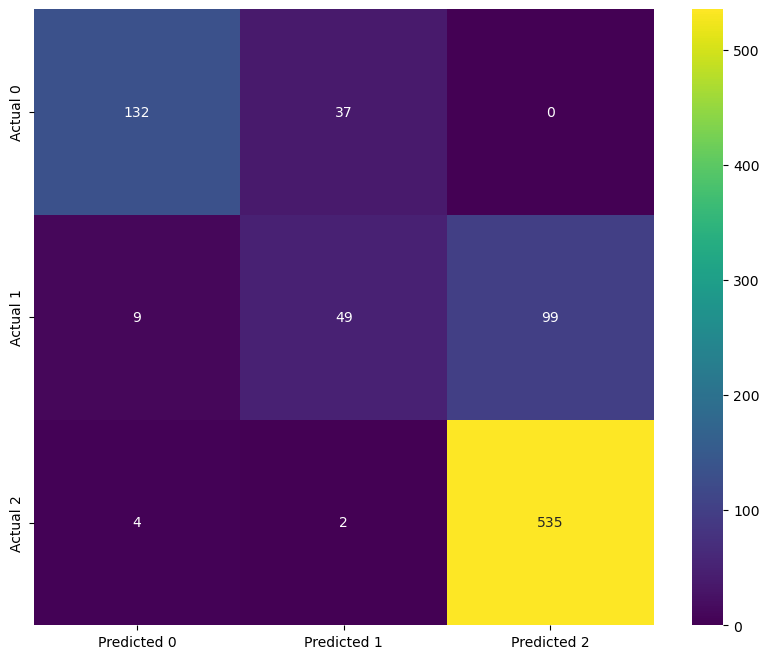

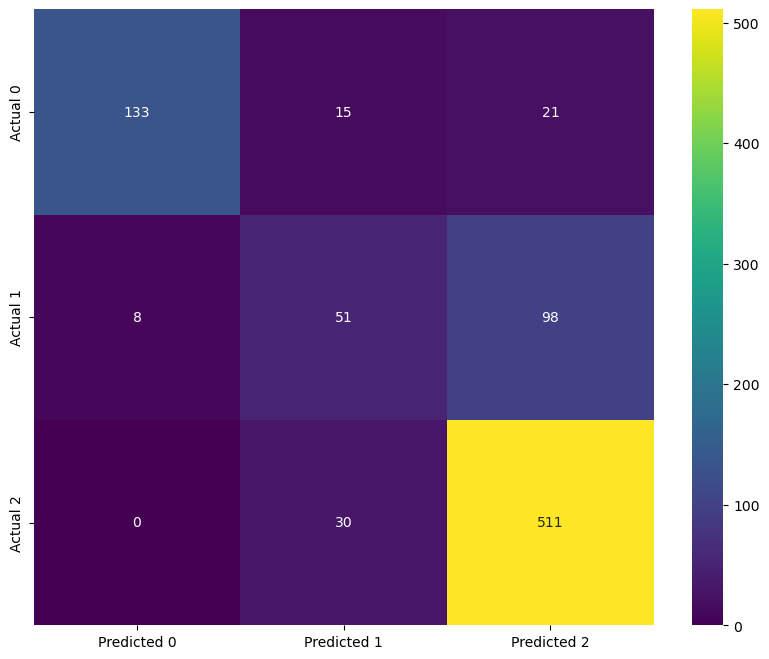

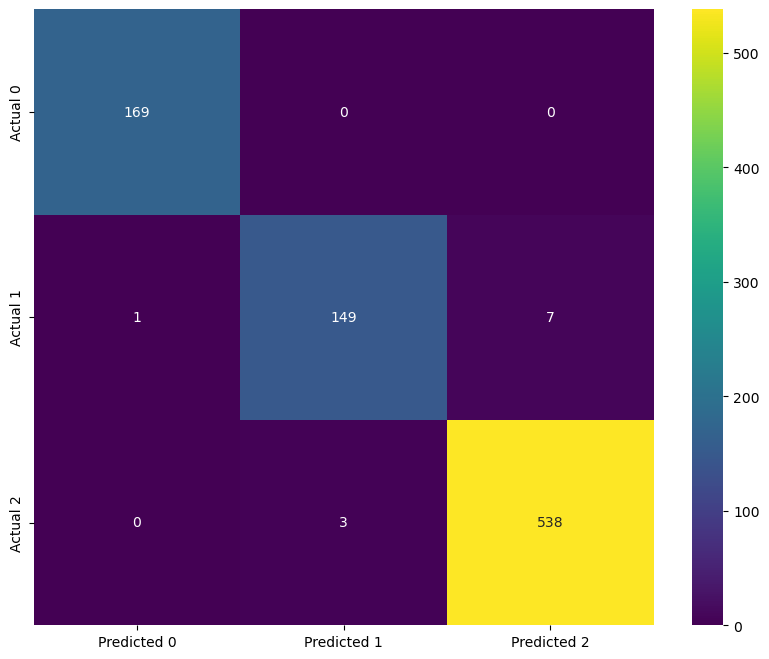

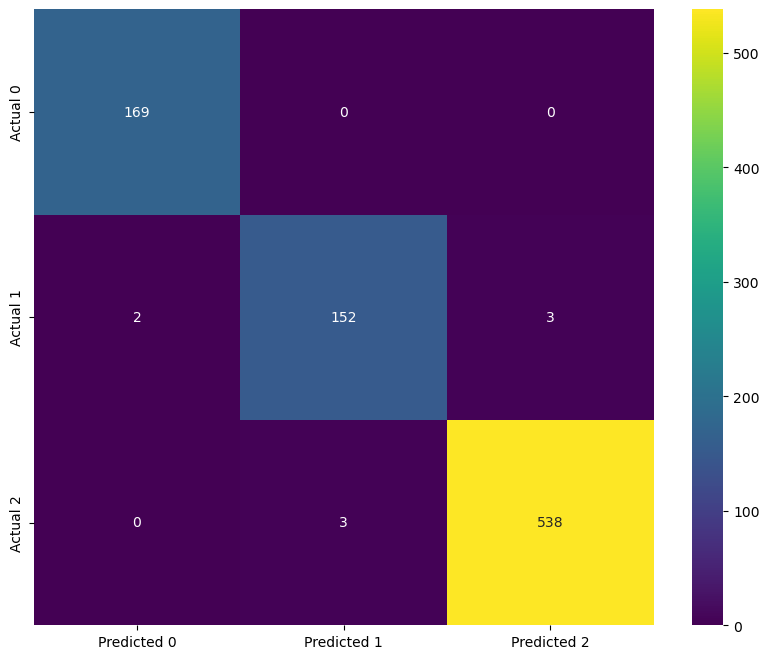

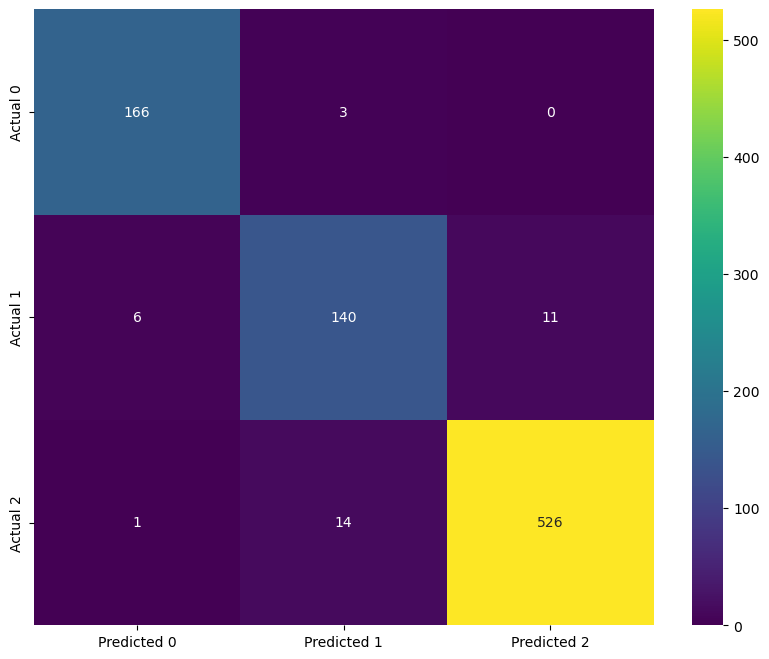

In [64]:
def plotCM(model,model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fig, ax = plt.subplots(figsize=(10,8)) 
    labels =unique_labels (y_test)
    column =[f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=column, index=indices)
    return sns.heatmap (table, annot=True, fmt='d', cmap='viridis',ax=ax)
for name, clf in models:
    plotCM(clf,name)

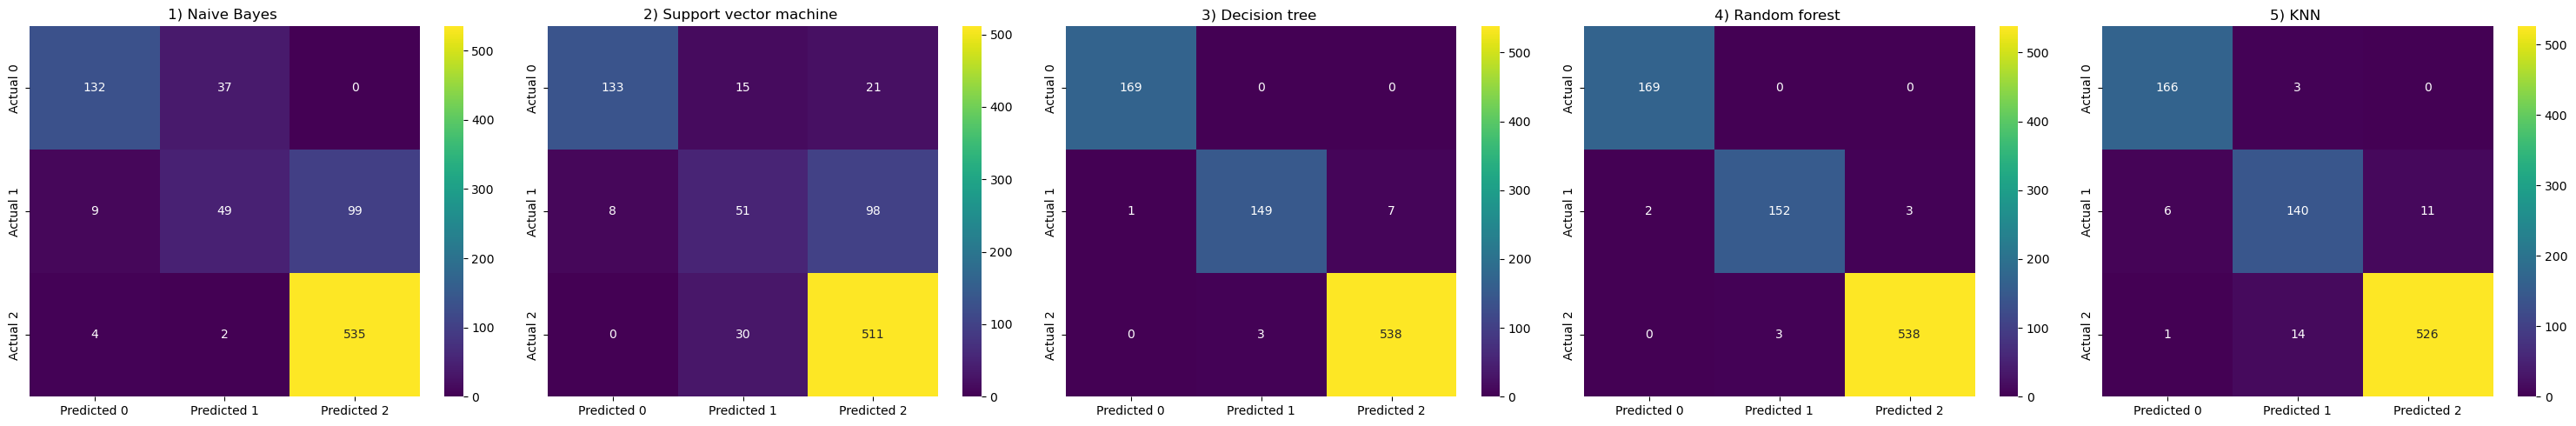

In [65]:
def plotCM(model,model_name, ax):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    labels =unique_labels (y_test)
    column =[f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=column, index=indices)
    sns.heatmap (table, annot=True, fmt='d', cmap='viridis',ax=ax)
    
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(30, 5))

for i, (name, clf) in enumerate(models):
    plotCM(clf, name, axes[i])
    axes[i].set_title(name)
    
plt.tight_layout()

## ROC

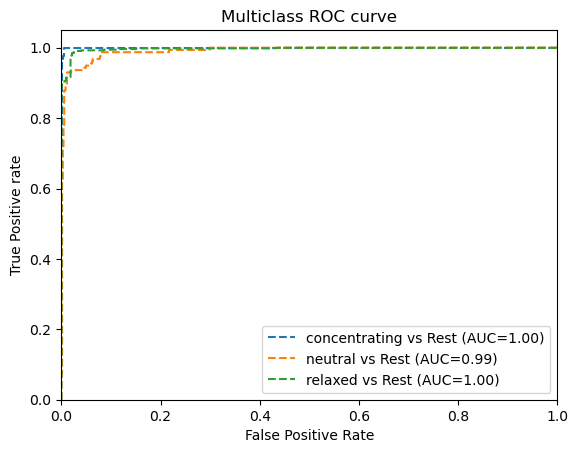

In [66]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2, max_depth=2))
RF.fit(X_train,y_train)
y_pred =RF.predict(X_test)
pred_prob = RF.predict_proba(X_test)


from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

# plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
#     print('Train set')
    pred = rf.predict_proba(X_train)
#     print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred , multi_class='ovr')))
#     print('Test set')
    pred = rf.predict_proba(X_test)
#     print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred , multi_class='ovr' )))
    return pred

In [90]:
def plot_ROC(model, model_name, X_train, y_train, X_test, y_test , axes):
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)

    # Binarize the y_test values
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

    # Compute the ROC curves and AUC scores for each class
    fpr = {}
    tpr = {}
    thresh = {}
    roc_auc = {}

    n_classes = y_test_binarized.shape[1]
    

    for i in range(n_classes):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
        # Plot the ROC curve for each class
        axes.plot(fpr[i], tpr[i], linestyle='--', label='%s vs Rest (AUC=%0.2f)' % (i, roc_auc[i]))


    # Set the plot limits and labels
    axes.set_xlim([0, 1])
    axes.set_ylim([0, 1.05])
    axes.set_xlabel('False Positive Rate')
    axes.set_ylabel('True Positive Rate')
#     axes[i].title('%s ROC Curve' % model_name)
    axes.legend(loc='lower right')
#     axes.show()

    # Return the predicted probabilities and ROC AUC scores
    return pred_prob, roc_auc

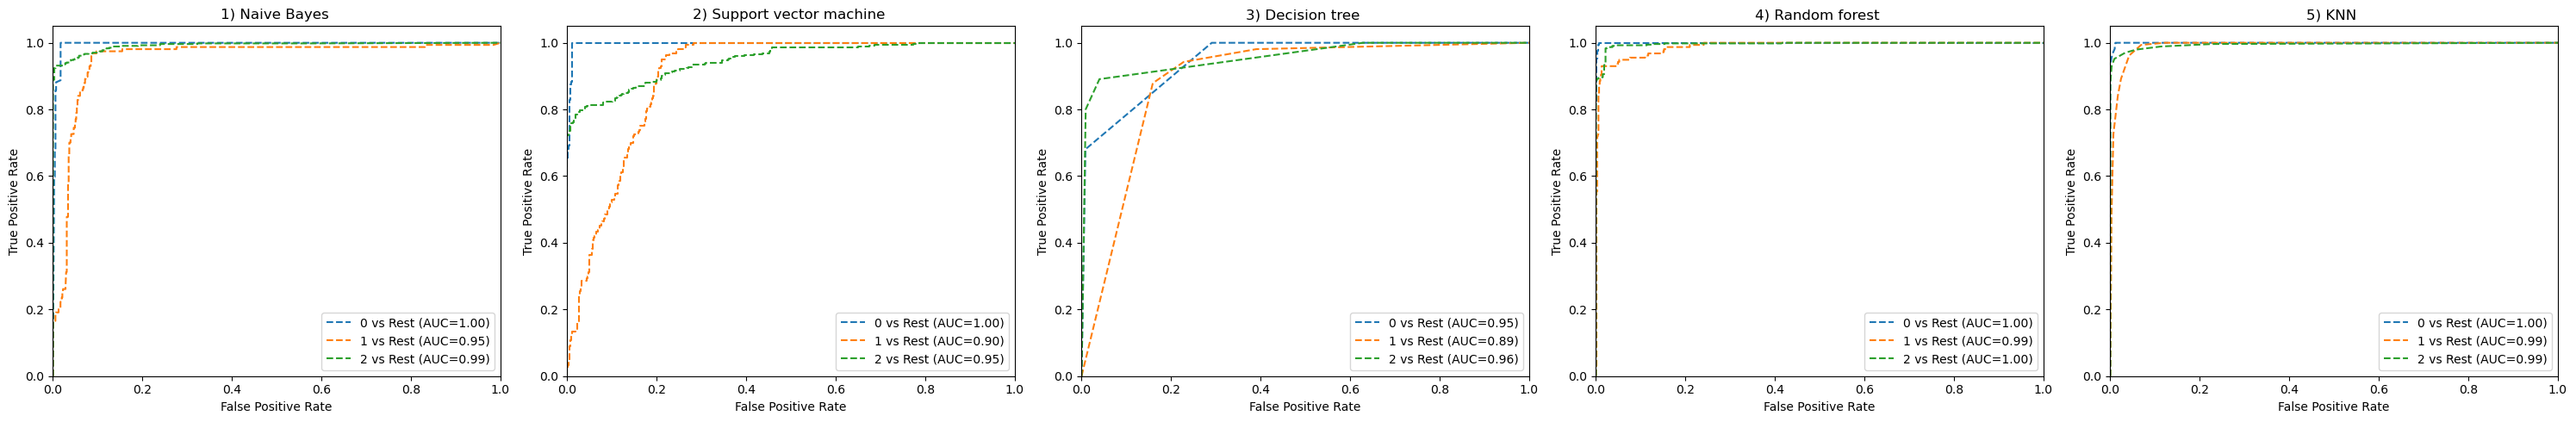

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(30, 5))

# for i, (name, clf) in enumerate(models):
#     plotCM(clf, name, axes[i])
#     axes[i].set_title(name)
    
# for (name, clf) in (models2):
for i, (name, clf) in enumerate(models):
    # Evaluate the model using the evaluate_model function
    pred_prob, roc_auc = plot_ROC(clf, name, X_train, y_train, X_test, y_test,axes[i] )
    
    axes[i].set_title(name)
    
plt.tight_layout()

In [94]:
models


[('1) Naive Bayes ', GaussianNB()),
 ('2) Support vector machine ', SVC()),
 ('3) Decision tree ',
  DecisionTreeClassifier(criterion='entropy', random_state=0)),
 ('4) Random forest ', RandomForestClassifier(random_state=0)),
 ('5) KNN ', KNeighborsClassifier(n_neighbors=7))]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)


In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

nb_classifier = OneVsRestClassifier(GaussianNB())
decision_tree_model = DecisionTreeClassifier(criterion="entropy",random_state=0,max_depth=2)
support_vector_machine = OneVsRestClassifier(SVC(kernel='rbf', probability=True))
Ada_Boost_Classifier = OneVsRestClassifier(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)))
random_forest_classifier = OneVsRestClassifier(RandomForestClassifier(max_features=0.2,max_depth=2))
knn = KNeighborsClassifier(n_neighbors=7)


models = [("1) Naive Bayes ",nb_classifier),
          ("2) Support vector machine ",support_vector_machine),
          ("3) Decision tree ",decision_tree_model),
          ("4) Random forest ",random_forest_classifier),
          ("5) KNN ",knn)]


models2 = [("1) Decision tree ",decision_tree_model),
          ("2) Support vector machine ",support_vector_machine),
         ("3) Naive Bayes ",nb_classifier),
         ("4) Random forest ",random_forest_classifier),
         ("5) Ada Boost ",Ada_Boost_Classifier)]

# for (name, clf) in (models2):
#     # Evaluate the model using the evaluate_model function
#     pred_prob, roc_auc = plot_ROC(clf, name, X_train, y_train, X_test, y_test)

## Hyperpramenter tuning

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [1, 5, 10,15,20,25,30,35,40],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create a random forest regressor
# rf = RandomForestRegressor()

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(rf, param_grid, cv=5,n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters and score
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# # Perform randomized search with cross-validation
# random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=5)
# random_search.fit(X_train, y_train)

# # Print the best hyperparameters and score
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best score: ", random_search.best_score_)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



# rf = RandomForestRegressor()
# rf_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [1, 5, 10,15,20,25,30,35,40],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# svm = SVR()
# svm_param_grid = {
#     'kernel': ['linear', 'rbf', 'poly'],
#     'C': [0.1, 1, 10],
#     'gamma': ['scale', 'auto'],
#     'epsilon': [0.01, 0.1, 1],
# }

# nb = GaussianNB()
# nb_param_grid = {
#     'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
# }

# dt = DecisionTreeClassifier()
# dt_param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# #AdaBoost classifier
# ab = AdaBoostClassifier()
# ab_param_grid = {
#     'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1],
# }

# models_HT = [(rf_param_grid,rf),
#              (svm_param_grid,svm),
#             (nb_param_grid,nb),
#             (dt_param_grid,dt),
#             (ab_param_grid,ab)]


In [ ]:
# def hyperTuning(param_grid,model):
#     # Perform grid search with cross-validation
#     grid_search = GridSearchCV(rf, param_grid, cv=5,n_jobs=-1)
#     grid_search.fit(X_train, y_train)

#     # Print the best hyperparameters and score
#     print("Best hyperparameters: ", grid_search.best_params_)
#     print("Best score: ", grid_search.best_score_)

#     # Perform randomized search with cross-validation
#     random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=5)
#     random_search.fit(X_train, y_train)

#     # Print the best hyperparameters and score
#     print("Best hyperparameters: ", random_search.best_params_)
#     print("Best score: ", random_search.best_score_)


# for param_grid, clf in models:
#     hyperTuning(param_grid,clf)